wizualizacja danych

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")

df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


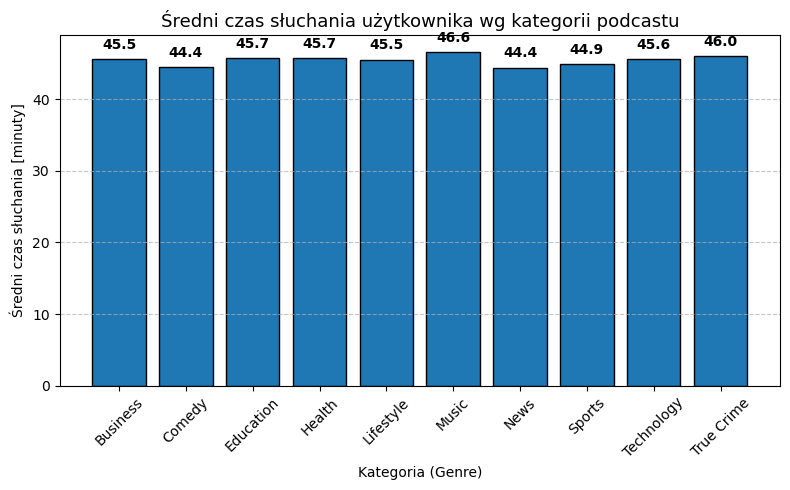

In [3]:
#jaka jest sredni czas sluchania per kategoria

avg_listening = df.groupby("Genre")["Listening_Time_minutes"].mean()

plt.figure(figsize=(8, 5))
bars = plt.bar(avg_listening.index, avg_listening.values, edgecolor="black")

plt.title("Średni czas słuchania użytkownika wg kategorii podcastu", fontsize=13)
plt.xlabel("Kategoria (Genre)")
plt.ylabel("Średni czas słuchania [minuty]")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#dodanie wyniku do kazdego slupka
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,  # przesunięcie lekko nad słupek
        f"{height:.1f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
    
plt.tight_layout()
plt.show()


In [4]:
#ile jest podcastow dla danej kategorii?

count_per_genre = df["Genre"].value_counts()

summary = pd.DataFrame({
    "Average_Listening_Time": avg_listening,
    "Podcast_Count": count_per_genre
}).sort_values(by="Average_Listening_Time", ascending=False)

print("Statystyki wg kategorii")


summary

Statystyki wg kategorii


,Average_Listening_Time,Podcast_Count
Genre,,
Music,46.578394,62743
True Crime,46.042507,85059
Health,45.741413,71416
Education,45.736640,49100
Technology,45.634749,86256
Business,45.538151,80521
Lifestyle,45.523117,82461
Sports,44.935722,87606
Comedy,44.426441,81453


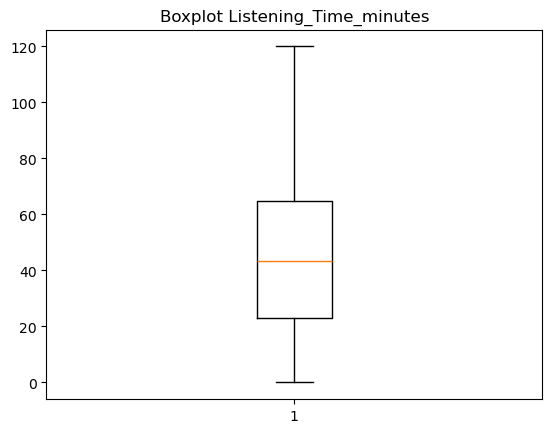

In [5]:
#wywalmy outlierów

import matplotlib.pyplot as plt
plt.boxplot(df["Listening_Time_minutes"])
plt.title("Boxplot Listening_Time_minutes")
plt.show()

In [6]:
#dobra jest box and whisker ale czy rzeczywiscie sa jakies outliery?

Q1 = df["Listening_Time_minutes"].quantile(0.25)
Q3 = df["Listening_Time_minutes"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[
    (df["Listening_Time_minutes"] < lower_bound) |
    (df["Listening_Time_minutes"] > upper_bound)
]

len(outliers)

#nie ma outlierow?

0

In [11]:
import pandas as pd

df = pd.read_csv("data/train.csv")

outliers_longer = df[df["Listening_Time_minutes"] > df["Episode_Length_minutes"]]

outliers_zero = df[df["Listening_Time_minutes"] == 0]

outliers_invalid_episode = df[df["Episode_Length_minutes"] <= 0]

print(f"Słuchanie dłuższe niż odcinek: {len(outliers_longer)} przypadków")
print(f"Słuchanie równe 0 minut: {len(outliers_zero)} przypadków")
print(f"Odcinek o długości <= 0: {len(outliers_invalid_episode)} przypadków")

print("\nSłuchanie dłuższe niż odcinek:")
display(outliers_longer[["Podcast_Name", "Genre", "Episode_Length_minutes", "Listening_Time_minutes"]].head(10))

print("\nSłuchanie równe 0 minut:")
display(outliers_zero[["Podcast_Name", "Genre", "Episode_Length_minutes", "Listening_Time_minutes"]].head(10))

print("\nOdcinek o długości <= 0:")
display(outliers_invalid_episode[["Podcast_Name", "Genre", "Episode_Length_minutes", "Listening_Time_minutes"]].head(10))


Słuchanie dłuższe niż odcinek: 2568 przypadków
Słuchanie równe 0 minut: 8551 przypadków
Odcinek o długości <= 0: 1 przypadków

Słuchanie dłuższe niż odcinek:


,Podcast_Name,Genre,Episode_Length_minutes,Listening_Time_minutes
113,Current Affairs,News,17.94000,17.94199
407,Sound Waves,Music,11.26000,11.26579
864,Life Lessons,Lifestyle,28.92000,28.92051
948,Educational Nuggets,Education,96.10732,96.10741
1316,Market Masters,Business,64.08000,68.63865
1538,Lifestyle Lounge,Lifestyle,30.67000,31.44000
2034,Sound Waves,Music,97.70000,97.76674
2296,Lifestyle Lounge,Lifestyle,118.03000,119.66000
2690,Health Hour,Health,10.64000,11.50971
2788,Home & Living,Lifestyle,33.85000,33.89817



Słuchanie równe 0 minut:


,Podcast_Name,Genre,Episode_Length_minutes,Listening_Time_minutes
37,Funny Folks,Comedy,5.83,0.0
256,Athlete's Arena,Sports,7.15,0.0
276,Melody Mix,Music,9.70,0.0
325,Fitness First,Health,12.43,0.0
372,Business Insights,Business,8.31,0.0
393,Sports Central,Sports,8.43,0.0
503,Criminal Minds,True Crime,8.87,0.0
515,Tech Trends,Technology,9.33,0.0
600,Business Insights,Business,6.60,0.0
606,Innovators,Technology,11.81,0.0



Odcinek o długości <= 0:


,Podcast_Name,Genre,Episode_Length_minutes,Listening_Time_minutes
150178,Fashion Forward,Lifestyle,0.0,9.60684
